In [11]:
pip install transformers --upgrade # ensure transformers package is installed and updated

In [2]:
pip install --upgrade pillow

In [2]:
# Set your Hugging Face token
token = "*************************************"

In [4]:
import matplotlib.pyplot as plt

In [6]:
#메모리 초기화
torch.cuda.empty_cache()

In [3]:
import requests
from PIL import Image
import torch
from PIL import ImageDraw, ImageFont

# 원본 이미지 열기
image_file = "http://images.cocodataset.org/val2017/000000039769.jpg"
raw_image = Image.open(requests.get(image_file, stream=True).raw)

# 모델에서 생성된 텍스트
generated_text = "This is the generated text from the model."

# 이미지에 텍스트 추가
draw = ImageDraw.Draw(raw_image)
font = ImageFont.load_default()  # 기본 폰트 사용
text_position = (10, 10)  # 텍스트 위치 설정
draw.text(text_position, generated_text, fill="white", font=font)

# 결과 이미지 저장 또는 표시
raw_image.show()
# raw_image.save('output_image_with_text.jpg')  # 저장할 경우

In [4]:
pip install googletrans==4.0.0-rc1

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Detected person with confidence 1.00


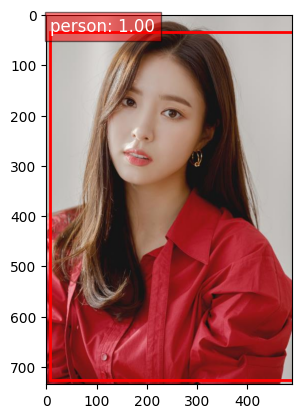


 긍정적 댓글(한국어):
ER :
이미지에 대해 긍정적 인 의견을 제시하십시오.어시스턴트 : 이미지에있는 여자는 아름답고 매력적인 미소가 있습니다.그녀는 빨간 셔츠를 입고 긴 머리카락을 가지고 있으며, 이는 그녀의 전반적인 매력을 더합니다.그녀의 얼굴의 클로즈업 샷은 그녀의 특징을 강조하고 그녀를 더욱 매력적으로 보이게합니다.


In [17]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
from torchvision.transforms.functional import to_pil_image
from transformers import AutoProcessor, LlavaForConditionalGeneration
from googletrans import Translator # import the Translator class from googletrans

# COCO 데이터셋의 클래스 레이블
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
    'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
    'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
    'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
    'toilet', 'TV', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
    'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# Load the Faster R-CNN model pre-trained on COCO
detection_model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
detection_model.eval()  # Set the model to evaluation mode

# Define a transformation to prepare the image
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
])

# LLAVA 모델 로드 (이미지 설명 생성용)
llava_model_id = "llava-hf/llava-1.5-7b-hf"
llava_model = LlavaForConditionalGeneration.from_pretrained(llava_model_id, torch_dtype=torch.float16, low_cpu_mem_usage=True).to(0)
processor = AutoProcessor.from_pretrained(llava_model_id)

# Load and transform the image
image_file = "/content/ssg.jpg"
# raw_image = Image.open(requests.get(image_file, stream=True).raw) 웹 이미지 열어볼 때 쓸 것
raw_image = Image.open(image_file)
image_tensor = transform(raw_image).unsqueeze(0)  # Add batch dimension

# Perform object detection
with torch.no_grad():
    predictions = detection_model(image_tensor)

# Set confidence threshold
confidence_threshold = 0.7

# Display the image and bounding boxes
plt.imshow(raw_image)
ax = plt.gca()

# Iterate over predictions
for box, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
    if score >= confidence_threshold:
        # Get coordinates of bounding boxes
        x0, y0, x1, y1 = box.tolist()
        rect = plt.Rectangle((x0, y0), x1 - x0, y1 - y0, fill=False, color='red', linewidth=2)
        ax.add_patch(rect)

        # Get the class name using the label index
        class_name = COCO_INSTANCE_CATEGORY_NAMES[label.item()]  # label이 텐서이므로 .item() 사용

        # Add class name and score to the image
        ax.text(x0, y0, f'{class_name}: {score:.2f}', color='white', fontsize=12,
                bbox=dict(facecolor='red', alpha=0.5))

        # Print the class name and score in the console
        print(f'Detected {class_name} with confidence {score:.2f}')

plt.show()

# LLAVA 모델로 텍스트 생성
conversation = [
    {
      "role": "user",
      "content": [
          {"type": "text", "text": "Give a positive comment on the image."},
          {"type": "image"},
      ],
    },
]

prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
inputs = processor(images=raw_image, text=prompt, return_tensors="pt").to(0, torch.float16)

output = llava_model.generate(**inputs, max_new_tokens=200, do_sample=False)
description = processor.decode(output[0][2:], skip_special_tokens=True)

# Google Translate를 사용해 텍스트를 한글로 번역
translator = Translator()
translated_description = translator.translate(description, src='en', dest='ko').text

# 번역 결과 출력
# print("\nOriginal Description (English):")
# print(description)

print("\n 긍정적 댓글(한국어):")
print(translated_description)


# output = llava_model.generate(**inputs, max_new_tokens=200, do_sample=False)
# print(processor.decode(output[0][2:], skip_special_tokens=True))

In [ ]:
어시스턴트 : 이미지에 있는 여자는 아름답고 매력적인 미소가 있습니다.
그녀는 빨간 셔츠를 입고 긴 머리카락을 가지고 있으며, 이는 그녀의 전반적인 매력을 더합니다.
그녀의 얼굴의 클로즈업 샷은 그녀의 특징을 강조하고 그녀를 더욱 매력적으로 보이게합니다.

In [ ]:
# The image features two cats lying on a pink couch, both of them sleeping peacefully.
# One cat is located on the left side of the couch, while the other cat is on the right side.
# The couch is covered with a pink blanket, providing a cozy and comfortable environment for the cats.
# 이미지에 좋은 의견을 제시하십시오.
# 어시스턴트 : 이미지에는 분홍색 소파에 누워있는 두 마리의 고양이가 자고 있거나 쉬고있는 것처럼 보입니다.
# 한 고양이는 소파의 왼쪽에 위치하고 다른 고양이는 오른쪽에 있습니다.
# 소파는 분홍색 담요로 덮여있어 고양이에게 아늑하고 편안한 환경이 제공됩니다.
# 이 장면은 고양이가 소파에서 함께 시간을 즐기면서 고양이의 편안하고 평화로운 특성을 포착합니다.

# positive comment
# 어시스턴트 : 이미지에는 분홍색 소파에 누워있는 두 마리의 고양이가 있으며, 한 고양이는 고양이가 자고 있고 다른 고양이는 깨어 있습니다.
# 잠자는 고양이는 소파의 왼쪽에 위치하고 깨어있는 고양이는 오른쪽에 있습니다.
# 고양이가 소파에서 함께 시간을 즐기고있는 것처럼 보이기 때문에 장면은 매우 아늑하고 편안합니다.